In [49]:
#to import all the necessary libraries:
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from skimage import data
from skimage import io
from skimage import color
from skimage import morphology

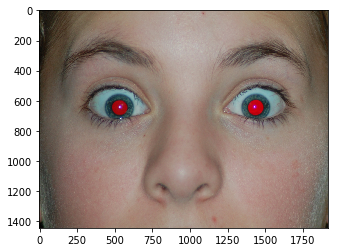

In [50]:
img = io.imread('BoldRedEye.jpg')
#img = io.imread('nonred.jpg')
plt.imshow(img)

# Step 1
## POI:

With respect to the method which was described in the slides, we have to select an **Point of Interest (POI)** which is the pupils. Since the images are imported as arrays in scikit-image, we can adjust are POI with selecting appropriate range of columns and rows.
 ## Thresholding:
Since our image is in RGB format and it is red-eyed, the red layer is the best among the R,G and B layers for thresholding. In order to do that you need a red layer histogram and as you can see, there is a minimum in it around code color 150 (in uint data-type).

Text(0.5, 1.0, 'Red layer Mask')

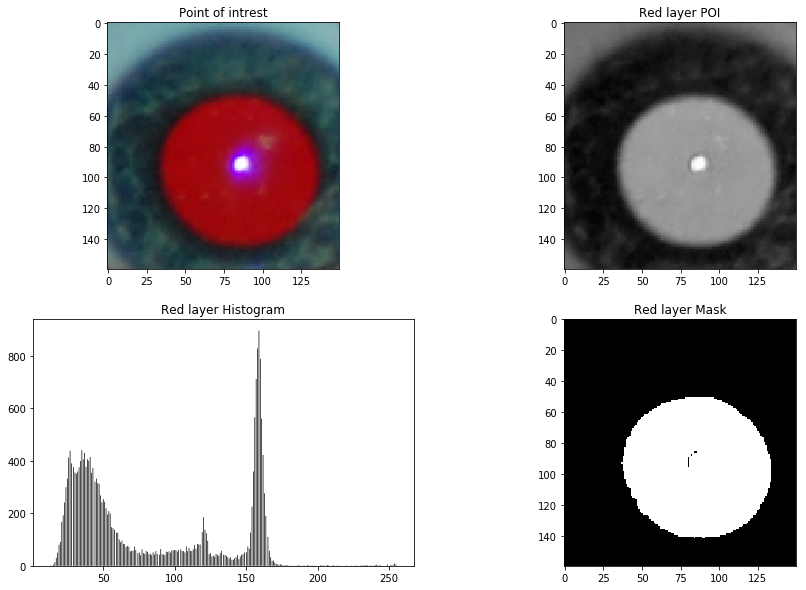

In [51]:
#poi = img[550:710, 1380:1500]
poi = img[550:710, 450:600]
poired = poi[:,:,0]
mask_poi = poi[:,:,0] > 140

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(poi)
ax[0].set_title("Point of intrest")
ax[1].imshow(poi[:,:,0], cmap='gray')
ax[1].set_title("Red layer POI")
ax[2].hist(poi[:,:,0].ravel(), bins=500, histtype='stepfilled', color='black')
ax[2].set_title("Red layer Histogram")
ax[3].imshow(mask_poi, cmap='gray')
ax[3].set_title("Red layer Mask")

# Step 2

## Refining the mask
Right now, we have an approximately good mask of our pupil but is not successfully meet our requirements to filter the red section completely, because of tow important factor:
1. holes:

... the holes in the middle of mask cause the red sections behind it not filtered.
2. size

... The size of our mask is not exactly fitting to the red area of the eye. Thus, some peripheral areas of the pupil remain red.

In order to delete the black areas and expanding the mask, two morphology methods are used.
1. closing: to fill the holes in the mask and remove tiny pixels out of pupil area if something remains.
2. dilation: to expand the area of our mask with respect to the structure element.

## Mask inversion
With respect to the explanations in the slides, you have to produce an inverse array of the mask which means conversions of all mask's values from zero (False) to one (True) and vice versa. Since our array is boolean, it is really convenient to use *NOT Operator* and to do that, I used `Numpy.logical_not()` method which is the best for *ndarrays*.

In [52]:
selem = morphology.disk(5)
closing_poi = morphology.closing(mask_poi,selem)
dilation_poi = morphology.dilation(closing_poi,selem)
perfect_mask_poi = dilation_poi #only for semantics
inv_perfect_mask_poi = np.logical_not(perfect_mask_poi)

Text(0.5, 1.0, 'inverted mask')

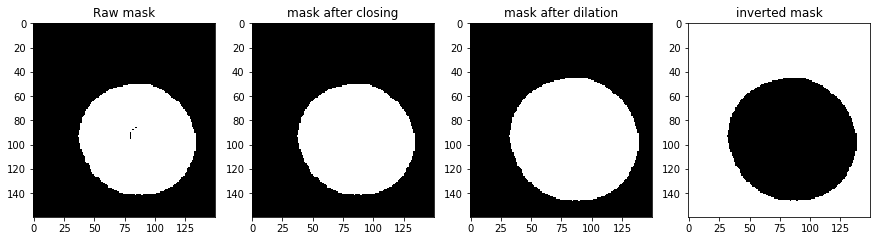

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(mask_poi, cmap='gray')
ax[0].set_title("Raw mask")
ax[1].imshow(closing_poi, cmap='gray')
ax[1].set_title("mask after closing")
ax[2].imshow(perfect_mask_poi, cmap='gray')
ax[2].set_title("mask after dilation")
ax[3].imshow(inv_perfect_mask_poi, cmap='gray')
ax[3].set_title("inverted mask")

# Step 3

## Apply the mask

In [63]:
poiR = poi[:, :, 0]
poiG = poi[:, :, 1]
poiB = poi[:, :, 2]

redeyefix = (poiG*perfect_mask_poi + poiB*perfect_mask_poi)/2
poiRemove = poiR * inv_perfect_mask_poi
poiR = poiRemove + redeyefix
img[550:710, 450:600,0] = poiR
#img[550:710, 1380:1500,0] = poiR

Text(0.5, 1.0, 'Color image')

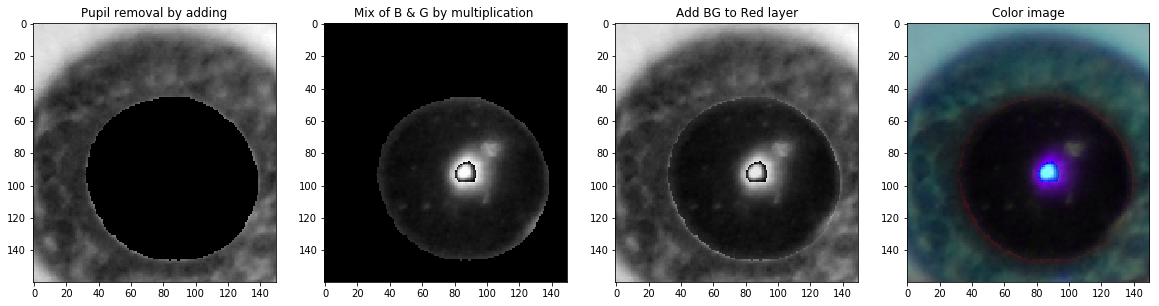

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(poiRemove, cmap='gray')
ax[0].set_title("Pupil removal by adding")
ax[1].imshow(redeyefix, cmap='gray')
ax[1].set_title("Mix of B & G by multiplication ")
ax[2].imshow(img[550:710, 450:600,0], cmap='gray')
ax[2].set_title("Add BG to Red layer")
ax[3].imshow(img[550:710, 450:600], cmap='gray')
ax[3].set_title("Color image")

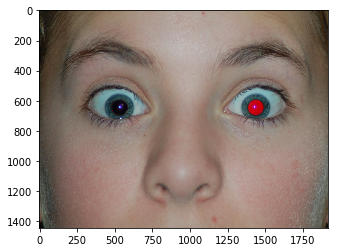

In [61]:
plt.imshow(img)

In [ ]:
io.imsave('nonred.jpg',img)